Plot planetary motion 
$$
m\frac{ d}{dt}\vec r(t) = -GmM \frac{\hat r}{r^2}
$$

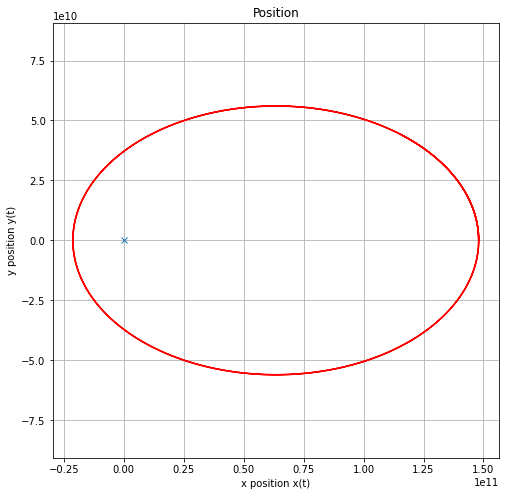

b) Distance closest to the sun:  21214056628.801464


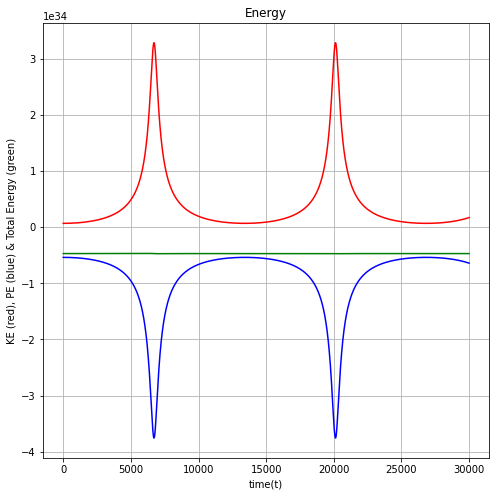

D) The total energy in GREEN remains constant, proving that energy is conserved.
E) The size of the energy non-conservation is  4.082029654566498e+29


In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Leapfrog Function
#work in MKS units
Tmax = 3*10**7    #seconds
Dt = 1000     #seconds
Nmax=int(Tmax/Dt)
G = 6.67384*10**(-11)   #m/sec**2
M = 1.99*10**30
m = 6.0*10**24
t  = np.zeros(Nmax+1, ) # numpy array holding the Nmax+1 values of the time
x  = np.zeros(Nmax+1, ) # numpy array holding the Nmax+1 values of the x position
y  = np.zeros(Nmax+1, ) # numpy array holding the Nmax+1 values of the y position
vx  = np.zeros(Nmax+1, ) # numpy array holding the Nmax+1 values of the x velocity
vy  = np.zeros(Nmax+1, ) # numpy array holding the Nmax+1 values of the y velocity
ax  = np.zeros(Nmax+1, ) # numpy array holding the Nmax+1 values of the x acceleration
ay  = np.zeros(Nmax+1, ) # numpy array holding the Nmax+1 values of the y acceleration
ke  = np.zeros(Nmax+1, ) 
pe  = np.zeros(Nmax+1, )
eTotal = np.zeros(Nmax+1, )
time  = np.zeros(Nmax+1, )
r = np.zeros(Nmax+1, )
eSize = np.zeros(Nmax+1, )
# implementing the leapfrog method we will interpret the positions x[n] and 
# accelerations a[n] as their values at the time Dt*n while the velocity v[n] will be 
# treated as the velocity at the time (n+1/2)*Dt.
t[0]=0
x[0]=1.48*10**11 #meters
y[0]=0
vx[0]=0
vy[0]=3.0*10**4/2 #meters/sec
vx[0]= vx[0]+ax[0]*Dt/2
vy[0]=vy[0]+ay[0]*Dt/2
r[0]=x[0]
ke[0]=0.5*m*(vx[0]**2+vy[0]**2)
pe[0]=-(G*M*m)/(r[0])
time[0]=0
eTotal[0]= ke[0]+pe[0]
eSize[0]=0

for n in range(1,Nmax+1):
    time[n] = n
    t[n] = Dt*n
    x[n]=x[n-1]+vx[n-1]*Dt
    y[n]=y[n-1]+vy[n-1]*Dt
    ax[n]=-(G*M)/((x[n])**2+(y[n])**2)*(x[n]/np.sqrt((x[n])**2+(y[n])**2))
    ay[n]=-(G*M)/((x[n])**2+(y[n])**2)*(y[n]/np.sqrt((x[n])**2+(y[n])**2))
    vx[n]=ax[n]*Dt+vx[n-1]
    vy[n]=ay[n]*Dt+vy[n-1]
    ke[n]= 0.5*m*(vx[n]**2 + vy[n]**2)
    pe[n] = -(G*M*m)/math.sqrt(x[n]**2 + y[n]**2)
    eTotal[n]= ke[n] + pe[n]
        
Figure = plt.figure(figsize=(8,8)) #create a fig object named "fig"
Axis   = Figure.add_subplot(111)   #create an axis object within "Figure" named "Axis"
Axis.plot(x,y,'r-')     #Add a curve described by the arrays x and y to Plot, choose a red solid curve.
Axis.plot(0.0,0.0,'x')  #Locate the position of the sun.
Axis.set(xlabel='x position x(t)', ylabel='y position y(t)', # add a tile and axis labels.
       title='Position')  
Axis.set_aspect('equal', 'datalim') #set the scale of the x and y axes to be the same
Axis.grid() #superimpose a grid on Plot
#fig.savefig("test.png") # save the figure as a png file.
plt.show(Figure) # Plot the figure here.

# Math to calculate closest to the sun
# The y value changes from postive to negative between indices 6708 and 6709

closest = math.sqrt(((x[6708]+x[6709])/2)**2 + ((y[6709]+y[6708])/2)**2)
print("b) Distance closest to the sun: ", closest)
     
Figure = plt.figure(figsize=(8,8)) #create a fig object named "fig"
Axis   = Figure.add_subplot(111)   #create an axis object within "Figure" named "Axis"
Axis.plot(time,ke,'r-')     #Add a curve described by the arrays x and y to Plot, choose a red solid curve.
Axis.plot(time,pe,'b-')     #Add a curve described by the arrays x and y to Plot, choose a red solid curve.
Axis.plot(time,eTotal,'g-')     #Add a curve described by the arrays x and y to Plot, choose a red solid curve.

Axis.set(xlabel='time(t)', ylabel='KE (red), PE (blue) & Total Energy (green)', # add a tile and axis labels.
       title='Energy')  
Axis.grid() #superimpose a grid on Plot
#fig.savefig("test.png") # save the figure as a png file.
plt.show(Figure) # Plot the figure here.
print("D) The total energy in GREEN remains constant, proving that energy is conserved.")

eSize = (pe[Nmax]+ke[Nmax])- (pe[0]+ke[0])
print("E) The size of the energy non-conservation is ", eSize)


